In [3]:
import imagesize
import os
import numpy as np
import cv2
from collections import Counter
from tqdm import tqdm

trainval_path = '../Dataset/TrainVal'
test_path = '../Dataset/Test'

tv_color_path = os.path.join(trainval_path, 'color')
tv_label_path = os.path.join(trainval_path, 'label')

# Print all kinds of image formats present the in dataset 
def print_image_formats():
    image_formats = set()
    for root, dirs, files in os.walk('../Dataset/TrainVal/color/'):
        for file in tqdm(files):
            if (not os.path.isdir(file)):
                image_formats.add(file.split('.')[-1])
    print(image_formats)

print_image_formats() # {'jpg'}

100%|██████████| 3680/3680 [00:00<00:00, 64016.85it/s]

{'jpg'}


In [4]:
def get_image_sizes(path):
    image_sizes = []
    image_areas = []
    
    # Traverse through all files in the given directory
    for root, dirs, files in os.walk(path):
        for file in tqdm(files):
            if not os.path.isdir(file):
                # Check if the file is a .mat file
                if file.endswith('.mat'):
                    img = cv2.imread(os.path.join(root, file))
                    if img is not None:
                        h, w = img.shape[:2]
                    else:
                        continue
                else:
                    # Get image dimensions for other file types
                    w, h = imagesize.get(os.path.join(root, file))

                # Append image dimensions and area to respective lists
                image_sizes.append((w, h))
                image_areas.append(w * h)
    
    return image_sizes, image_areas

# Get image sizes and areas for images in the dataset
image_sizes, image_areas = get_image_sizes('../Dataset/TrainVal/color/')

100%|██████████| 3680/3680 [00:28<00:00, 131.33it/s]


In [ ]:
# Top 5 most common dimensions
counter = Counter(image_sizes)
print(f"Top 5 most common dimensions: {counter.most_common(5)}")

# Smallest dimension
min_dim = min(min(image_sizes, key=lambda x: min(x[0],x[1])))
print(f"Smallest dimension: {min_dim}")

# Largest dimension
max_dim = max(max(image_sizes, key=lambda x: max(x[0],x[1])))
print(f"Largest dimension: {max_dim}")

# Average Dimension
avg_dim = np.mean(image_sizes, axis=0)
print(f"Average Dimension: {avg_dim}")

# Average Area
avg_area = np.mean(image_areas)
sqrt_avg_area = int(np.sqrt(avg_area))
print(f"Average Area: {avg_area}")
print(f"Square root of Average Area: {sqrt_avg_area}")

# Top 5 most common dimensions: [((500, 375), 770), ((500, 333), 488), ((375, 500), 250), ((333, 500), 221), ((300, 225), 201)]
# Smallest dimension: 108
# Largest dimension: 3264
# Average Dimension: [431.03342391 383.42038043]
# Average Area: 171954.2214673913
# Square root of Average Area: 414

# Best resize dimension is 256x256
# Prevents excessive upscaling of small images.
# Keeps computational efficiency reasonable.
# Maintains a square format for neural networks.
# Avoids unnecessary interpolation artifacts.


Top 5 most common dimensions: [((500, 375), 770), ((500, 333), 488), ((375, 500), 250), ((333, 500), 221), ((300, 225), 201)]
Smallest dimension: 108
Largest dimension: 3264
Average Dimension: [431.03342391 383.42038043]
Average Area: 171954.2214673913
Square root of Average Area: 414


In [12]:
def image_path_to_annotation_path(image_path):
    """
    Convert image path to corresponding annotation path.
    Assumes that the annotation files are in the 'label' directory and have the same name as the images.
    """
    # Replace 'color' with 'label' in the path
    annotation_path = image_path.replace('color', 'label')
    
    # Replace the file extension from .jpg to .png
    annotation_path = annotation_path.replace('.jpg', '.png')
    
    # Check if the annotation file exists
    if not os.path.exists(annotation_path):
        raise ValueError(f"Annotation file does not exist for {image_path}")

    return annotation_path


def get_image_paths():
    """
    Get all image paths in the dataset.
    The paths are relative to the dataset root directory.
    """
    image_paths = []
    
    # Traverse through all files in the given directory
    for root, dirs, files in os.walk(tv_color_path):
        for file in tqdm(files):
            if not os.path.isdir(file):
                # Check if the file is a .mat file
                if file.endswith('.jpg'):
                    img_path = os.path.join(root, file)
                    image_paths.append(img_path)

    return image_paths

image_paths = get_image_paths()

print(image_paths[:5])
print(len(image_paths))


100%|██████████| 3680/3680 [00:00<00:00, 59828.28it/s]

['../Dataset/TrainVal\\color\\Abyssinian_1.jpg', '../Dataset/TrainVal\\color\\Abyssinian_10.jpg', '../Dataset/TrainVal\\color\\Abyssinian_100.jpg', '../Dataset/TrainVal\\color\\Abyssinian_101.jpg', '../Dataset/TrainVal\\color\\Abyssinian_102.jpg']
3680


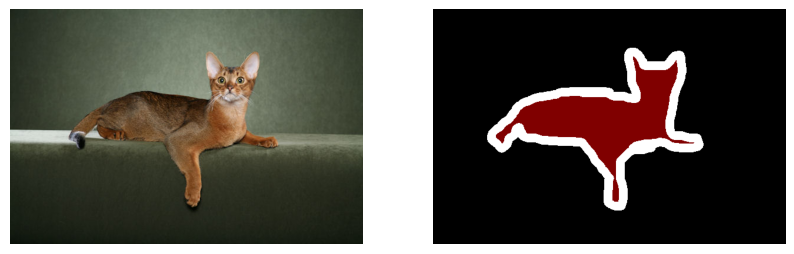

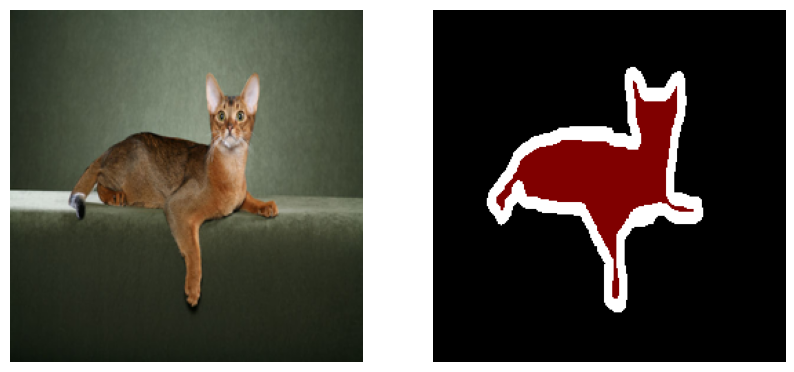

In [13]:
from PIL import Image
import matplotlib.pyplot as plt

# Function to display an image and its annotation side by side
def display_image_path(image_path, annotation_path=None):
    if annotation_path is not None:
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))
        ax[0].imshow(Image.open(image_path))
        ax[1].imshow(Image.open(annotation_path))
        ax[0].axis('off')
        ax[1].axis('off')
    else:
        plt.imshow(Image.open(image_path))
        plt.axis('off')
    plt.show()

# Function to display an image and its annotation side by side
def display_image(image, annotation=None):
    if annotation is not None:
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))
        ax[0].imshow(image)
        ax[1].imshow(annotation)
        ax[0].axis('off')
        ax[1].axis('off')
    else:
        plt.imshow(image)
        plt.axis('off')
    plt.show()


# Function to resize an image and its annotation to a given size
def resize_image(image_path, annotation_path, size=(256, 256)):
    img = Image.open(image_path)
    annotation = Image.open(annotation_path)
    img_resized = img.resize(size)
    annotation_resized = annotation.resize(size)
    return img_resized, annotation_resized

image_path = image_paths[0]
annotation_path = image_path_to_annotation_path(image_path)

# Resize the image and its annotation
img_resized, annotation_resized = resize_image(image_path, annotation_path)

# Display the resized image and annotation
display_image_path(image_path, annotation_path)
display_image(img_resized, annotation_resized)

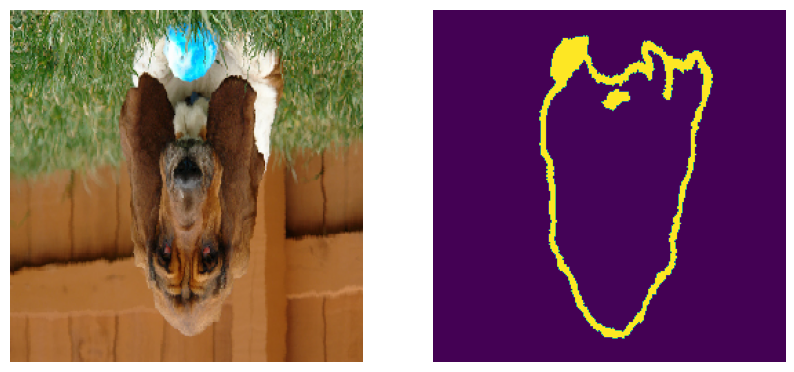

[  0   2 255]


In [31]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import random

dim = 256

# Define the augmen5ation pipeline
augmentation_pipeline = A.Compose([
    A.ElasticTransform(alpha=10, sigma=20, p=0.5, border_mode=cv2.BORDER_REFLECT_101),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.Affine(translate_percent=0.05, scale=(0.9, 1.1), rotate=(-30, 30), p=0.5, cval=0, mode=cv2.BORDER_CONSTANT),
    A.Resize(dim, dim, interpolation=cv2.INTER_NEAREST),  # Ensure no interpolation in segmentation mask
    ToTensorV2()
])

# Function to augment an image and its annotation
# The annotation is augmented using the same transformations as the image
def augment_image(image, annotation):
    augmented = augmentation_pipeline(image=image, mask=annotation)
    return augmented['image'], augmented['mask']

# Select a random image and its corresponding annotation
i = random.randint(0, len(image_paths) - 1)

image = np.array(Image.open(image_paths[i]))
annotation = np.array(Image.open(image_path_to_annotation_path(image_paths[i])))

# Augment the image and annotation
augmented_image, augmented_annotation = augment_image(image, annotation)

# Display the augmented image and annotation
display_image(augmented_image.permute(1, 2, 0).numpy(), augmented_annotation)

# Print unique values in the annotation
print(np.unique(augmented_annotation))

In [43]:
dim = 256

if not os.path.exists('../augmented_data'):
    os.makedirs('../augmented_data')
if not os.path.exists('../augmented_data/color'):
    os.makedirs('../augmented_data/color')
if not os.path.exists('../augmented_data/label'):
    os.makedirs('../augmented_data/label')

for i in tqdm(range(len(image_paths))):
    image_path = image_paths[i]
    annotation_path = image_path_to_annotation_path(image_path)

    # Read the image and annotation
    image = np.array(Image.open(image_path))
    annotation = np.array(Image.open(annotation_path))

    # Augment the image and annotation
    augmented_image, augmented_annotation = augment_image(image, annotation)

    # Save the augmented image and annotation
    Image.fromarray(augmented_image.permute(1, 2, 0).numpy()).convert('RGB').save(os.path.join('../augmented_data/color', os.path.basename(image_path)))
    Image.fromarray(augmented_annotation.numpy()).save(os.path.join('../augmented_data/label', os.path.basename(annotation_path)))


100%|██████████| 3680/3680 [00:55<00:00, 66.70it/s] 


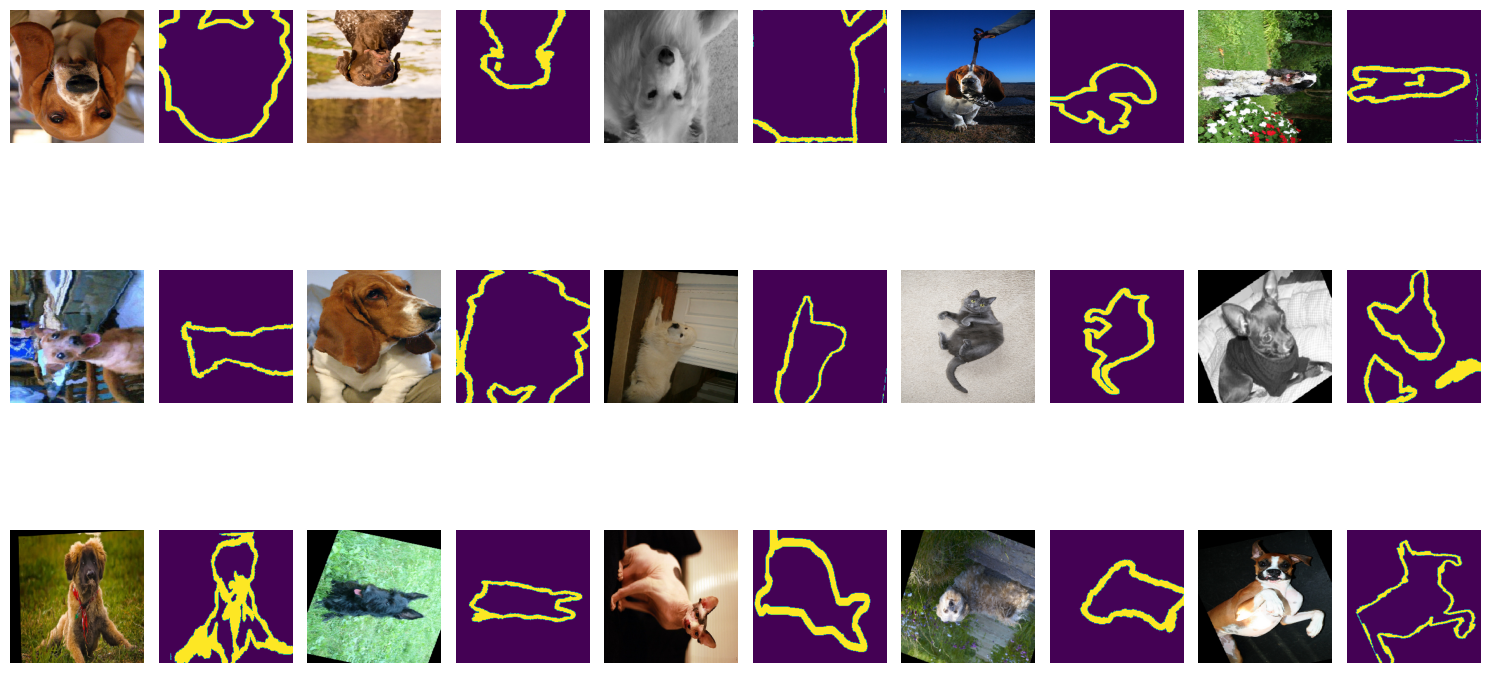

In [44]:
# Show off 15 augmentations (3*5) with trimaps
fig, axes = plt.subplots(3, 10, figsize=(15, 9))


rand_is = random.sample(range(0, len(image_paths)), 15)

for i,x in enumerate(rand_is):
    image_path = image_paths[x]
    annotation_path = image_path_to_annotation_path(image_path)
    
    image = np.array(Image.open(image_path))
    annotation = np.array(Image.open(annotation_path))
    
    aug_image, aug_annotation = augment_image(image, annotation)
    
    axes[i // 5, (i % 5) * 2].imshow(aug_image.permute(1, 2, 0).numpy())
    axes[i // 5, (i % 5) * 2].axis('off')
    axes[i // 5, (i % 5) * 2 + 1].imshow(aug_annotation.numpy())
    axes[i // 5, (i % 5) * 2 + 1].axis('off')

plt.tight_layout()
plt.show()
